In [1]:
import requests
# url
url = "https://api.data.gov/ed/collegescorecard/v1/schools?school.region_id__not=5&api_key=Ezk0NpRNKVQmzc3YoY0dwuRceTWV72bA0oSe8OgR"
res = requests.get(url)

In [2]:
res.status_code

200

In [3]:
res.headers

{'Server': 'openresty', 'Date': 'Sun, 02 Sep 2018 04:53:01 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding, Accept-Encoding', 'X-RateLimit-Limit': '1000', 'X-RateLimit-Remaining': '998', 'Access-Control-Allow-Methods': 'GET', 'Access-Control-Allow-Origin': '*', 'X-Content-Type-Options': 'nosniff', 'X-Vcap-Request-Id': '4b5bf52d-ef6b-4595-6851-fd4a97826bc5', 'X-Frame-Options': 'DENY', 'Strict-Transport-Security': 'max-age=31536000, max-age=31536000; preload', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Age': '2', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cSsSfU])', 'Cache-Control': 'public, max-age=300', 'X-Cache': 'MISS'}

In [4]:
len(res.content)

11191954

In [5]:
!pip3.7 install python-dotenv --user
!pip3.7 install --user kaggle

In [1]:
import os
import sys
from dotenv import load_dotenv, find_dotenv
dotenvpth=find_dotenv()
load_dotenv(dotenvpth)
"""Ensure KAGGLE_COFIG_DIR is in os.environ else add it to download.
no KAGGLE_USERNAME and KAGGLE_PWD to be in the environment varibles.
It create problem for the kaggle api."""
from kaggle import cli


def getdata(clicmd, storelocation):
    """
    Get files from Kaggle using kaggle api.
    """
#     os.environ.setdefault("KAGGLE_CONFIG_DIR","/home/doogle/.kaggle")
    path = os.path.join(os.path.expanduser('~'), '.kaggle')
    try:
        os.makedirs(path)
    except FileExistsError:
        pass

    """To Safeguard the file keep its permission 600
    with open(os.path.join(path, 'kaggle.json'), 'r') as fp:
        os.chmod(fp.name, 0o600)
    """

    """--force is to force download the file even if its already downloded."""
    sys.argv = clicmd.split()
    """calling kaggle cli to get the files using credentials from ~/.kaggle/kaggle.json"""
    os.chdir(storelocation)
#     os.environ.setdefault("KAGGLE_CONFIG_DIR","/home/doogle/.kaggle")
    cli.main()

getdata(clicmd='kaggle competitions download -c titanic --force', 
        storelocation=r"/doogle/githubrepos/datawrangling/datawarangling/")

/home/doogle/.kaggle


100%|██████████| 59.8k/59.8k [00:00<00:00, 1.98MB/s]


100%|██████████| 28.0k/28.0k [00:00<00:00, 4.68MB/s]


100%|██████████| 3.18k/3.18k [00:00<00:00, 748kB/s]

In [2]:
os.listdir("/doogle/githubrepos/datawrangling/datawarangling/")
from pathlib import Path
import datetime
def t(tm):
    return datetime.datetime.fromtimestamp(tm).strftime('%Y-%m-%d %H:%M:%S')
sorted([" ".join([t(f.stat().st_mtime), str(f)]) for f in Path("/doogle/githubrepos/datawrangling/datawarangling/").iterdir()])


['2018-08-26 00:35:57 /doogle/githubrepos/datawrangling/datawarangling/__init__.py',
 '2018-08-26 00:44:38 /doogle/githubrepos/datawrangling/datawarangling/titanic.csv',
 '2018-08-26 13:30:15 /doogle/githubrepos/datawrangling/datawarangling/datawrangling_jupyter1.ipynb',
 '2018-08-26 13:45:28 /doogle/githubrepos/datawrangling/datawarangling/cleansed.csv',
 '2018-08-26 15:00:14 /doogle/githubrepos/datawrangling/datawarangling/svmpredict.ipynb',
 '2018-08-26 15:00:34 /doogle/githubrepos/datawrangling/datawarangling/decisiontree_predict.ipynb',
 '2018-08-26 15:01:02 /doogle/githubrepos/datawrangling/datawarangling/datawrangling_cleandata.ipynb',
 '2018-08-28 08:58:05 /doogle/githubrepos/datawrangling/datawarangling/dw_module1.py',
 '2018-09-02 09:24:32 /doogle/githubrepos/datawrangling/datawarangling/.ipynb_checkpoints',
 '2018-09-02 09:32:32 /doogle/githubrepos/datawrangling/datawarangling/datawrangling_jupyter2.ipynb',
 '2018-09-02 12:44:52 /doogle/githubrepos/datawrangling/datawarangli

# Exploring and Processing Data

In [2]:
import os
import numpy as np
import pandas as pd

In [110]:
data_path = os.path.join(os.curdir,"data")
trfl = os.path.join(data_path, "train.csv")
tstfl = os.path.join(data_path, "test.csv")

trdf = pd.read_csv(trfl, index_col="PassengerId")
tstdf = pd.read_csv(tstfl, index_col="PassengerId")
print(type(trdf), type(tstdf))
from pprint import pprint as pp
pp(trdf.info())
pp(tstdf.info())
tstdf["Survived"]=-999
df = pd.concat((trdf, tstdf), axis=0, sort=False)
df.info()

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarke

In [111]:
pd.set_option('display.max_rows', 10)
df.head(3)
df.tail()
df[["Survived", "Name"]]
df.Survived # or df["Survived"]
df.loc[5:10,"Age":"Cabin"] #Column Range
df.loc[5:10, ["Age", "Sex", "Cabin"]]

,Age,Sex,Cabin
PassengerId,,,
5,35.0,male,NaN
6,NaN,male,NaN
7,54.0,male,E46
8,2.0,male,NaN
9,27.0,female,NaN
10,14.0,female,NaN


In [112]:
df.iloc[5:15,4:-2] #Column Range
df.iloc[5:15,2:-2]
len(df.loc[df.Sex=="male",:])
df.loc[((df.Sex=="male") & (df.Pclass != 1)),:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1298,-999,2,"Ware, Mr. William Jeffery",male,23.0,1,0,28666,10.5000,NaN,S
1305,-999,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1307,-999,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


# Sumary Statistics

In [113]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-318.747135,2.294882,29.881138,0.498854,0.385027,33.295479
std,466.107167,0.837836,14.413493,1.041658,0.865560,51.758668
min,-999.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-999.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [115]:
pp({"mean":df.Fare.mean(), "median": df.Fare.median(),
   "min": df.Fare.max(), "max": df.Fare.max(),
   "range": df.Fare.max() - df.Fare.min(),
   "25%": df.Fare.quantile(.25),
   "50%": df.Fare.quantile(.5),
   "75%": df.Fare.quantile(.75),
   "variance": df.Fare.var(),
   "std": df.Fare.std()})

{'25%': 7.8958,
 '50%': 14.4542,
 '75%': 31.275,
 'max': 512.3292,
 'mean': 33.29547928134557,
 'median': 14.4542,
 'min': 512.3292,
 'range': 512.3292,
 'std': 51.75866823917411,
 'variance': 2678.959737892891}


In [9]:
!pip3.7 install matplotlib --user

In [116]:
%matplotlib inline

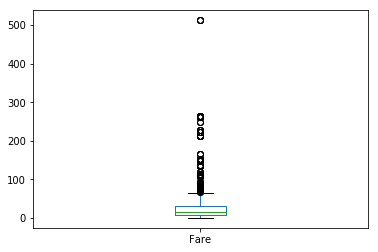

In [117]:
df.Fare.plot(kind="box")

In [118]:
pp((df.describe(include="all"), df.Sex.value_counts(normalize=True),
   df[df.Survived != -999].Sex.value_counts(normalize=True)))

(           Survived       Pclass                  Name   Sex          Age  \
count   1309.000000  1309.000000                  1309  1309  1046.000000   
unique          NaN          NaN                  1307     2          NaN   
top             NaN          NaN  Connolly, Miss. Kate  male          NaN   
freq            NaN          NaN                     2   843          NaN   
mean    -318.747135     2.294882                   NaN   NaN    29.881138   
...             ...          ...                   ...   ...          ...   
min     -999.000000     1.000000                   NaN   NaN     0.170000   
25%     -999.000000     2.000000                   NaN   NaN    21.000000   
50%        0.000000     3.000000                   NaN   NaN    28.000000   
75%        1.000000     3.000000                   NaN   NaN    39.000000   
max        1.000000     3.000000                   NaN   NaN    80.000000   

              SibSp        Parch    Ticket         Fare        Cabin Embar

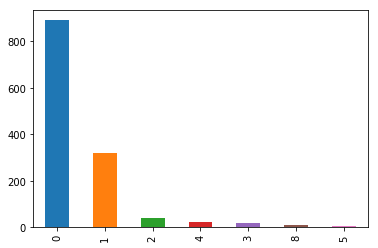

In [119]:
df.SibSp.value_counts().plot(kind="bar")

Current size: [6.0, 4.0]


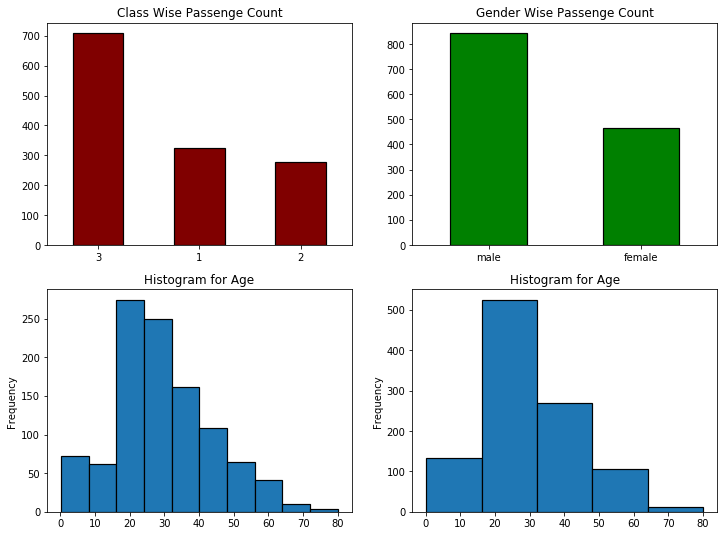

In [120]:
import matplotlib.pyplot as plt
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

fig, axes = plt.subplots(nrows=2, ncols=2)
df.Pclass.value_counts().plot(kind="bar", rot=0, title="Class Wise Passenge Count", color="maroon",
                                 ax=axes[0,0], edgecolor='black', linewidth=1.2)
df.Sex.value_counts().plot(kind="bar", rot=0, title="Gender Wise Passenge Count", color="g",
                                 ax=axes[0,1], edgecolor='black', linewidth=1.2)

df.Age.plot(kind="hist", rot=0, title="Histogram for Age",
                                 ax=axes[1,0], edgecolor='black', linewidth=1.2)
df.Age.plot(kind="hist", rot=0, title="Histogram for Age",
                                 ax=axes[1,1], edgecolor='black', linewidth=1.2, bins=5)

[0.40767455974362266, 4.367709134122922]


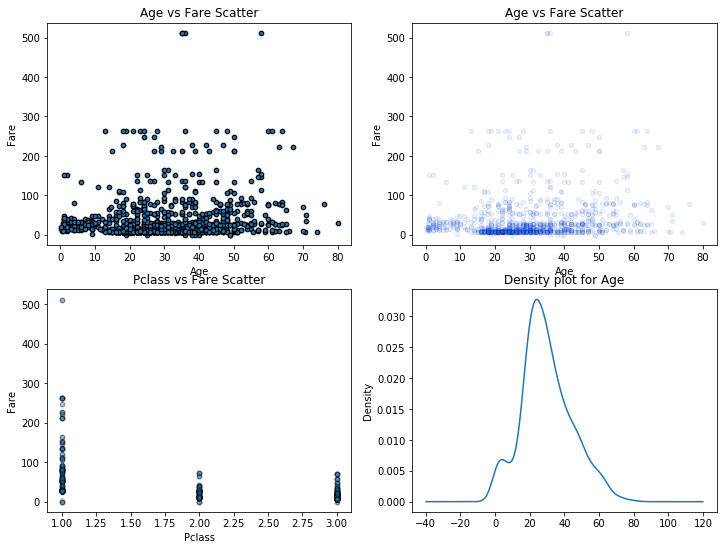

In [121]:
pp([df.Age.skew(), df.Fare.skew()])
fig, axes = plt.subplots(nrows=2, ncols=2)
df.plot.scatter(x='Age', y='Fare', title="Age vs Fare Scatter", ax=axes[0, 0], edgecolor='black', linewidth=1.2)
df.plot.scatter(x='Age', y='Fare', title="Age vs Fare Scatter", alpha=0.1, ax=axes[0, 1], edgecolor='blue', linewidth=.62)
df.plot.scatter(x='Pclass', y='Fare', title="Pclass vs Fare Scatter", alpha=0.15, ax=axes[1, 0], edgecolor='black', linewidth=1.2)
df.Age.plot(kind="kde", title="Density plot for Age", ax=axes[1, 1])

In [122]:
def aggs(pddf):
    names = {
        'Faremean': pddf['Fare'].mean(),
        'Farestd':  pddf['Fare'].std(),
        'Farerange': pddf['Fare'].max() - pddf['Fare'].min(),
        'FareMax':  pddf['Fare'].max(),
        'FareSum': pddf['Fare'].sum(),
    }

    return pd.Series(names, index=['Farerange', 'Farestd', 'Faremean',
                                   'FareSum', 'FareMax', ])
# aggs = {
#     "Fare":
#     ["mean", "median", "max", np.min, "std" ]
# }

pp({
    "Sex_groupby_Age_Med": df.groupby('Sex').Age.median(),
    "Pclass_groupby_Age_Med": df.groupby(['Pclass']).Age.median(),    
    "Pclass_groupby_FareAge_Med": df.groupby(['Pclass'])['Fare', 'Age'].median(),
    "Pclass_grpby_FareMean_AgeMed": df.groupby("Pclass").agg({"Fare": "mean", "Age":"median"}),
    "Pclass_grpby_complexaggs": #df.groupby("Pclass").agg(aggs)
    df.groupby("Pclass").apply(aggs),
    "Pclass_Sex_grpby_fare_med": df.groupby(["Pclass", "Sex"])["Fare"].median()
})

{'Pclass_Sex_grpby_fare_med': Pclass  Sex   
1       female    80.92915
        male      49.50420
2       female    23.00000
        male      13.00000
3       female    10.48960
        male       7.89580
Name: Fare, dtype: float64,
 'Pclass_groupby_Age_Med': Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64,
 'Pclass_groupby_FareAge_Med':            Fare   Age
Pclass               
1       60.0000  39.0
2       15.0458  29.0
3        8.0500  24.0,
 'Pclass_grpby_FareMean_AgeMed':              Fare   Age
Pclass                 
1       87.508992  39.0
2       21.179196  29.0
3       13.302889  24.0,
 'Pclass_grpby_complexaggs':         Farerange    Farestd   Faremean     FareSum   FareMax
Pclass                                                       
1        512.3292  80.447178  87.508992  28265.4043  512.3292
2         73.5000  13.607122  21.179196   5866.6374   73.5000
3         69.5500  11.494358  13.302889   9418.4452   69.5500,
 'Sex_groupby_Age_Med': Sex
female    

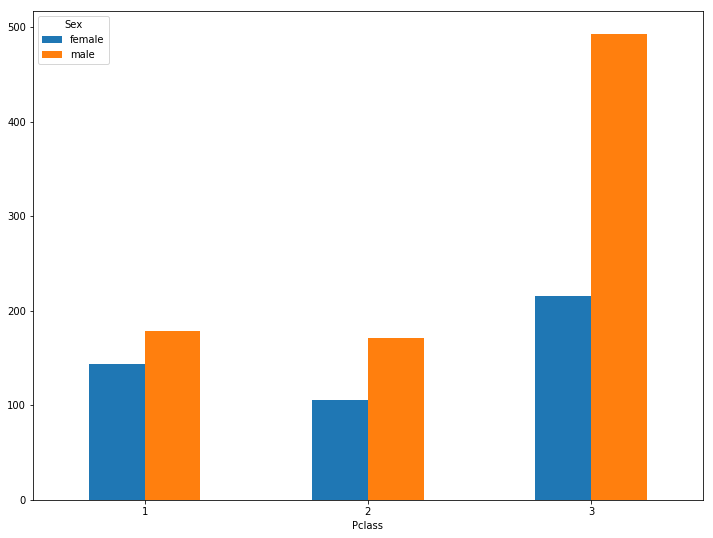

In [123]:
pd.crosstab(df.Pclass, df.Sex)
pd.crosstab(df.Pclass, df.Sex).plot(kind="bar", rot=0)

In [124]:
df.pivot_table(index="SibSp", columns=("Pclass", "Sex"), values="Age", aggfunc="mean")

Pclass          1                     2                     3           
Sex        female       male     female       male     female       male
SibSp                                                                   
0       36.057143  41.226316  29.570175  31.906697  23.744186  28.117836
1       38.563636  41.402308  25.823000  29.619048  24.103778  23.059783
2       41.200000  35.666667  16.800000  21.000000  10.928571  25.333333
3       25.000000  19.000000  30.000000        NaN  11.000000  13.666667
4             NaN        NaN        NaN        NaN  12.571429   7.000000
5             NaN        NaN        NaN        NaN  13.000000   8.750000
8             NaN        NaN        NaN        NaN        NaN  14.500000

In [125]:
df.groupby(["Pclass", "Sex"]).Age.mean().unstack()

Sex,female,male
Pclass,,
1,37.037594,41.029272
2,27.499223,30.815380
3,22.185329,25.962264


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [127]:
df[df.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [128]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [130]:
pd.crosstab(df[df.Survived!=-999].Survived, df[df.Survived!=-999].Embarked)
df.groupby(["Pclass", "Embarked"]).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [131]:
df.Embarked.fillna("C", inplace=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [133]:
df[df.Fare.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-999,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [141]:
medval=df.loc[(df["Pclass"]==3) & (df.Embarked=="S"), "Fare"].median()
pp(medval)
df.Fare = df.groupby('Pclass', sort=False).Fare.apply(lambda x: x.fillna(x.median()))
# df.Fare.fillna(medval, inplace=True) above is same as this but 1 liner
df.info()

8.05
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


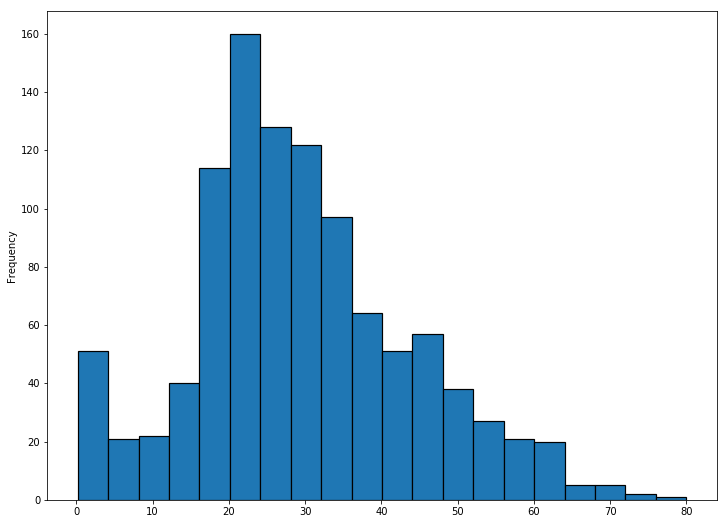

In [145]:
df.Age.plot(kind="hist", bins=20, edgecolor='black', linewidth=1.2)

In [151]:
df.groupby("Sex").agg({"Age":"median", "Fare":"mean"})


,Age,Fare
Sex,,
female,27.0,46.198097
male,28.0,26.133124


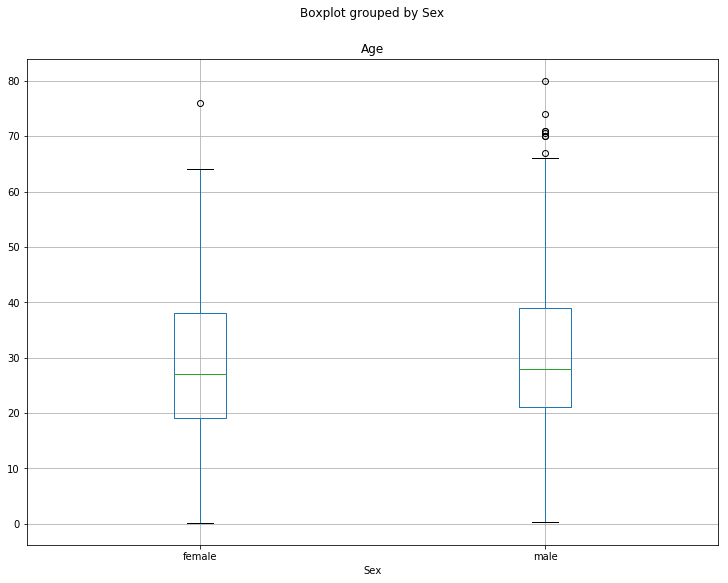

In [153]:
df[df.Age.notnull()].boxplot("Age", "Sex")

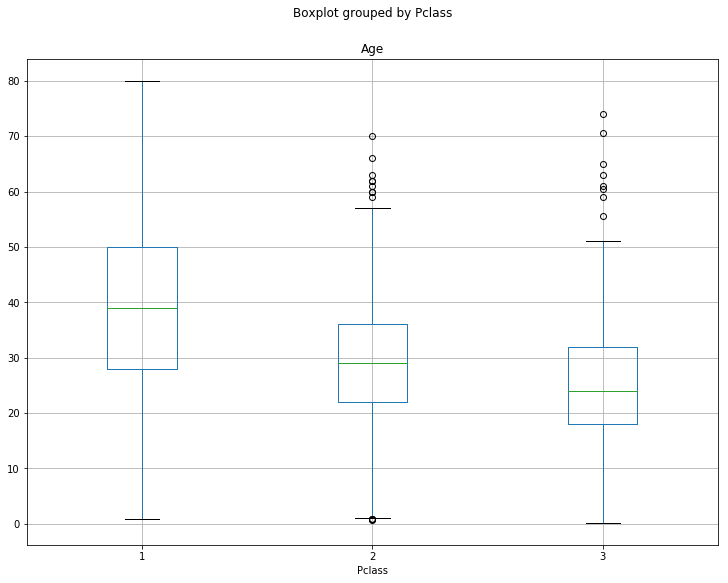

In [157]:
medageval = df.groupby("Sex").Age.transform('median')
medageval
# returns series with median values for each row
# then df.Age.fillna(medageval, inplace=True)
df[df.Age.notnull()].boxplot("Age", "Pclass")

In [158]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [161]:
def gettitle(name):
    return name.split(",")[1].split(".")[0].strip().lower()
df.Name.map(gettitle)
df.Name.map(gettitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [162]:
def gettitle(name):
    titlegrp = {'mr':'Mr', 'mrs':'Mrs', 'miss':"Miss", 'master':"Master",
                'don':"Sir", 'rev':"Sir", 'dr':"Officer", 'mme':"Mrs", 'ms':"Mrs",
       'major':"Officer", 'lady':"Lady", 'sir':"Sir", 'mlle':"Miss", 'col':"Officer", 
                'capt':"Officer", 'the countess':"Lady",
       'jonkheer':"Sir", 'dona':"Lady"}
    return titlegrp.get(name.split(",")[1].split(".")[0].strip().lower())
df.Name.map(gettitle)
df.Name.map(gettitle).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [164]:
df['Title'] = df.Name.map(gettitle)

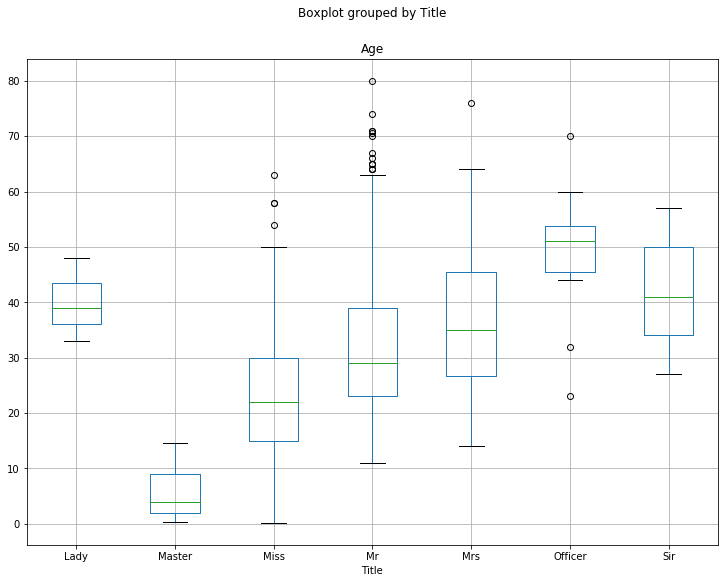

In [166]:
df[df.Age.notnull()].boxplot("Age", "Title")

In [168]:
medageval = df.groupby("Title").Age.transform('median')
medageval.unique()
# returns series with median values for each row
df.Age.fillna(medageval, inplace=True)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Survived    1309 non-null int64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1309 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [173]:
df.index.name

'PassengerId'

In [178]:
newcsv=os.path.join(os.getcwd(),"data","data.csv")
df.to_csv(newcsv)
